<a href="https://colab.research.google.com/github/SakaSaheed/AI-ML-Project/blob/main/Self_Navigating_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This code is written for self Navigating Robot


In [40]:
#@title Import libraries
import json
import pandas as pd

In [41]:
#@title Open data
fp = open('sensorData.json', 'r')
locations = json.load(fp)

In [42]:
#@title Preview data
df = pd.DataFrame(locations)
df.head()

,dummy-id,loc-id,pose,sensorData
0,16,0,"[-1.75, 1.1999999999999997, 0.1, 0.0, 0.0, 0.0...","[0.2657748313730152, 0.2968860607230098, 0.291..."
1,17,1,"[0.7, 1.2, 0.1, 0.0, 0.0, 0.0, 1.0]","[0.2951680647982441, 0.27015409208274616, 0.30..."
2,18,2,"[-1.749999999999999, 0.175, 0.1, 0.0, 0.0, 0.0...","[1.3670766303238258, 1.3136635109233177, 0.998..."
3,19,3,"[0.19999999999999998, 0.17500000000000002, 0.1...","[1.3734306614759393, 1.2960895734674371, 1.404..."
4,20,4,"[-0.3, -0.8, 0.1, 0.0, 0.0, 0.0, 1.0]","[2.270213995521004, 2.3519605401634154, 2.4428..."


In [43]:
#df = df.drop(columns=['pose'])
#df = df.drop(columns=['sensorData'])

In [44]:
#df.head()

#@title View into and output data

In [45]:
df[['x', 'y', 'z', 'qx', 'qy', 'qz', 'qw']] = pd.DataFrame(df['pose'].tolist(), index= df.index)


In [46]:
df[[theta for theta in range(0, 350, 10)]] = pd.DataFrame(df['sensorData'].tolist(), index=df.index)

In [47]:
df.head()

,dummy-id,loc-id,pose,sensorData,x,y,z,qx,qy,qz,...,250,260,270,280,290,300,310,320,330,340
0,16,0,"[-1.75, 1.1999999999999997, 0.1, 0.0, 0.0, 0.0...","[0.2657748313730152, 0.2968860607230098, 0.291...",-1.75,1.200,0.1,0.0,0.0,0.0,...,2.944820,2.922372,1.912113,0.824022,0.616637,0.471561,0.430531,0.303578,0.287485,0.330230
1,17,1,"[0.7, 1.2, 0.1, 0.0, 0.0, 0.0, 1.0]","[0.2951680647982441, 0.27015409208274616, 0.30...",0.70,1.200,0.1,0.0,0.0,0.0,...,0.435482,0.414969,0.441973,0.457466,0.536906,0.403966,0.355510,0.324689,0.282098,0.317645
2,18,2,"[-1.749999999999999, 0.175, 0.1, 0.0, 0.0, 0.0...","[1.3670766303238258, 1.3136635109233177, 0.998...",-1.75,0.175,0.1,0.0,0.0,0.0,...,3.930004,3.878783,2.961584,3.006811,2.756324,2.090221,1.754511,1.510422,1.432755,1.300269
3,19,3,"[0.19999999999999998, 0.17500000000000002, 0.1...","[1.3734306614759393, 1.2960895734674371, 1.404...",0.20,0.175,0.1,0.0,0.0,0.0,...,1.928766,1.977919,1.947753,0.992563,1.090693,1.216317,1.392585,1.551693,1.394505,1.313262
4,20,4,"[-0.3, -0.8, 0.1, 0.0, 0.0, 0.0, 1.0]","[2.270213995521004, 2.3519605401634154, 2.4428...",-0.30,-0.800,0.1,0.0,0.0,0.0,...,2.477627,2.448054,2.437988,2.533387,2.710302,2.053658,2.213168,2.706091,2.455167,2.359184


In [48]:
#@title Train Data
X_train = df[[theta for theta in range(0, 350, 10)]]
y_train = df['loc-id']

In [49]:
#@title Import Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [50]:
#@title Modeling
model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=3))

In [51]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))])

#Upload new test data

In [52]:
#@title Test Data
fp = open('testSensorData.json', 'r')
test_locations = json.load(fp)

In [53]:
df = pd.DataFrame(test_locations)
df.head()

,dummy-id,loc-id,pose,sensorData
0,18,2,"[-1.749999999999999, 0.175, 0.1, -0.0, 0.0, 5....","[1.576750161910678, 1.4437569822988128, 1.3193..."
1,19,3,"[0.19999999999999998, 0.17500000000000002, 0.1...","[1.6996949705281317, 1.7096183205118711, 1.798..."
2,20,4,"[-0.3, -0.8, 0.1, -0.0, 0.0, 3.7075900573899947]","[0.7849971334827804, 0.906488703690898, 1.1509..."
3,16,0,"[-1.75, 1.1999999999999997, 0.1, -0.0, 0.0, 1....","[0.38572171213370937, 0.32781328611493354, 0.3..."


In [54]:
df[[theta for theta in range(0, 351, 10)]] = pd.DataFrame(df['sensorData'].tolist(), index= df.index)

In [55]:
#To check lenght
len(df['sensorData'].tolist()[0])

36

In [56]:
#Test input and output
X_test = df[[theta for theta in range(0, 350, 10)]]
y_test = df['loc-id']

In [57]:
y_pred = model.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


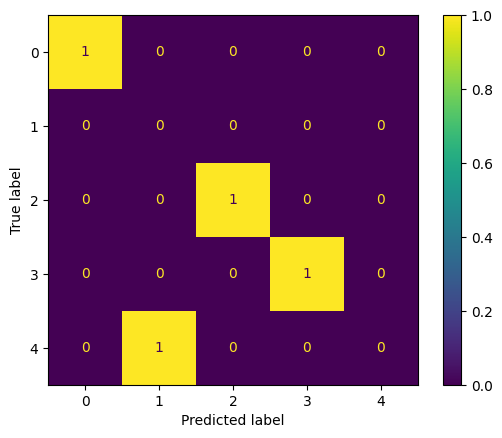

In [59]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()